# AF Database (AFDB) Analysis

This notebook provides an analysis of the MIT-BIH Atrial Fibrillation Database (AFDB)

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

## 1. Dataset Overview

Let's first get all records from the AFDB database and examine their basic properties.

In [2]:
# Get list of all records in AFDB
record_list = wfdb.get_record_list('afdb')
print(f"Total number of records in AFDB: {len(record_list)}")
print(f"\nRecord names: {record_list}")

Total number of records in AFDB: 25

Record names: ['00735', '03665', '04015', '04043', '04048', '04126', '04746', '04908', '04936', '05091', '05121', '05261', '06426', '06453', '06995', '07162', '07859', '07879', '07910', '08215', '08219', '08378', '08405', '08434', '08455']


## 2. Record Durations

Now let's analyze the duration of each record.

In [3]:
# Analyze each record
record_data = []

print("Analyzing all records...\n")
print("="*80)

for idx, record_name in enumerate(record_list, 1):
    try:
        # Read record
        record = wfdb.rdrecord(record_name, pn_dir='afdb')
        
        # Calculate duration
        duration_seconds = len(record.p_signal) / record.fs
        duration_minutes = duration_seconds / 60
        duration_hours = duration_minutes / 60
        
        record_data.append({
            'Record': record_name,
            'Duration (min)': duration_minutes,
            'Duration (hours)': duration_hours,
            'Sampling Rate (Hz)': record.fs,
            'Channels': len(record.sig_name)
        })
        
        print(f"{idx}. {record_name}:")
        print(f"   Duration: {duration_hours:.2f} hours ({duration_minutes:.1f} min)")
        print(f"   Sampling rate: {record.fs} Hz")
        print(f"   Channels: {len(record.sig_name)}")
        print()
        
    except Exception as e:
        print(f"Error processing {record_name}: {e}\n")

print("="*80)

Analyzing all records...

Error processing 00735: sampto must be greater than sampfrom

Error processing 03665: sampto must be greater than sampfrom

3. 04015:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

4. 04043:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

5. 04048:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

6. 04126:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

7. 04746:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

8. 04908:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

9. 04936:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

10. 05091:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

11. 05121:
   Duration: 10.23 hours (613.7 min)
   Sampling rate: 250 Hz
   Channels: 2

12. 05261:
   Duration: 10.23 hours (613.7 min)
   Sampl

In [4]:
# Create DataFrame for better visualization
df = pd.DataFrame(record_data)
print("\SUMMARY TABLE")
print("="*80)
print(df.to_string(index=False))
print("="*80)

\SUMMARY TABLE
Record  Duration (min)  Duration (hours)  Sampling Rate (Hz)  Channels
 04015      613.717333         10.228622                 250         2
 04043      613.717333         10.228622                 250         2
 04048      613.717333         10.228622                 250         2
 04126      613.717333         10.228622                 250         2
 04746      613.717333         10.228622                 250         2
 04908      613.717333         10.228622                 250         2
 04936      613.717333         10.228622                 250         2
 05091      613.717333         10.228622                 250         2
 05121      613.717333         10.228622                 250         2
 05261      613.717333         10.228622                 250         2
 06426      613.717333         10.228622                 250         2
 06453      555.000000          9.250000                 250         2
 06995      613.717333         10.228622                 250  

## 3. Overall Statistics

In [5]:
# Calculate overall statistics
total_duration_hours = df['Duration (hours)'].sum()
avg_duration_hours = df['Duration (hours)'].mean()
min_duration = df['Duration (hours)'].min()
max_duration = df['Duration (hours)'].max()

print("\n" + "="*80)
print("OVERALL DATASET STATISTICS")
print("="*80)
print(f"\nTotal Records: {len(record_list)}")
print(f"Total Duration: {total_duration_hours:.2f} hours ({total_duration_hours*60:.1f} minutes)")
print(f"Average Duration per Record: {avg_duration_hours:.2f} hours")
print(f"Shortest Record: {min_duration:.2f} hours")
print(f"Longest Record: {max_duration:.2f} hours")
print("="*80)


OVERALL DATASET STATISTICS

Total Records: 25
Total Duration: 234.28 hours (14056.8 minutes)
Average Duration per Record: 10.19 hours
Shortest Record: 9.25 hours
Longest Record: 10.23 hours


## 4. Visualization: Record Durations

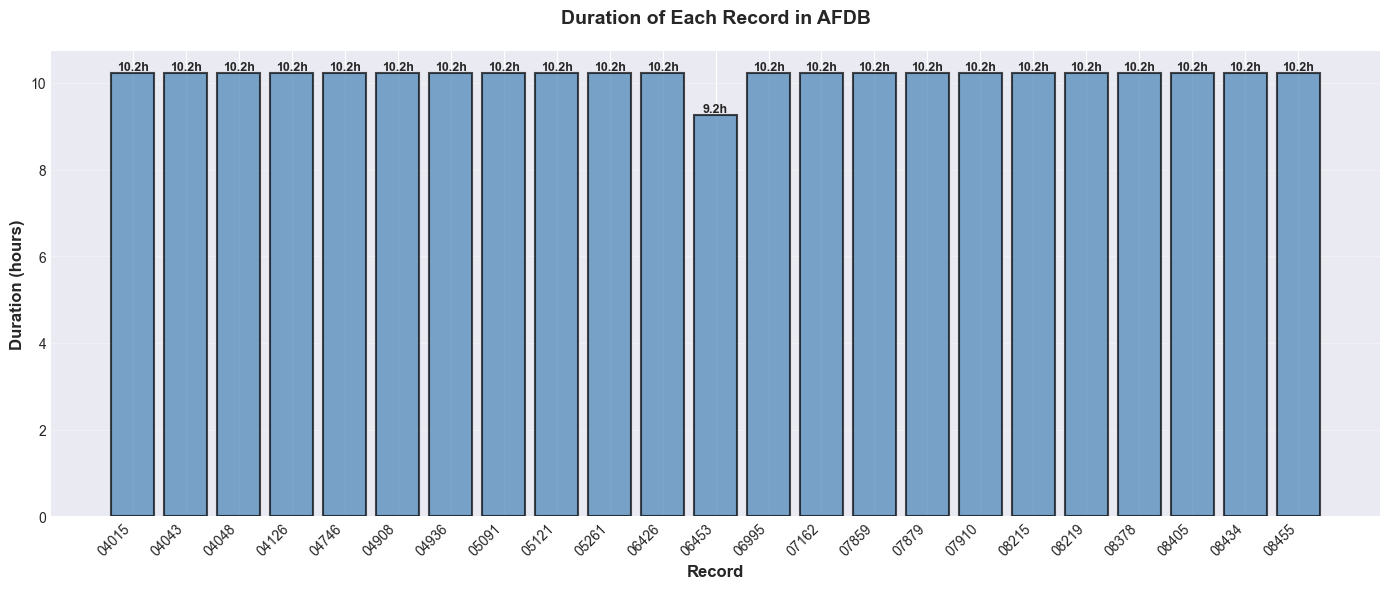

In [6]:
# Plot record durations
fig, ax = plt.subplots(figsize=(14, 6))

records = df['Record'].values
durations = df['Duration (hours)'].values

bars = ax.bar(range(len(records)), durations, color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Record', fontsize=12, weight='bold')
ax.set_ylabel('Duration (hours)', fontsize=12, weight='bold')
ax.set_title('Duration of Each Record in AFDB', fontsize=14, weight='bold', pad=20)
ax.set_xticks(range(len(records)))
ax.set_xticklabels(records, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, duration) in enumerate(zip(bars, durations)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{duration:.1f}h',
            ha='center', va='bottom', fontsize=9, weight='bold')

plt.tight_layout()
plt.show()